# Research on new game releases

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

From the initial database, there are 16713 entries with missing data that needs to be filled in or deleted. These entries list what platforms are the game has released on, the sales per region, ESRB rating, score, year of release, and the name. 

# Step 1

- Opening the data file and studying the general information

In [1]:
#import pandas and other important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats as st
import numpy as np

!pip install seaborn
import seaborn as sns

warnings.filterwarnings("ignore")

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#read all input data and assign each dataset to a variable
try:
    games = pd.read_csv('megaline_calls.csv')
except:
    games = pd.read_csv('/datasets/games.csv')

# Step 2

- Replace the column names (make them lowercase).

- Convert the data to the required types.

- Describe the columns where the data types have been changed and why.

- If necessary, decide how to deal with missing values:
    
    Explain why you filled in the missing values as you did or why you decided to leave them blank.
    
    Why do you think the values are missing? Give possible reasons.
    
    Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.

- Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [3]:
#Replacing the column names

#checking on info
games.info()

#renaming the column names
games.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales',
                'other_sales', 'critic_score', 'user_score', 'rating']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


looking at games.info, it shows that we have a lot of missing information. What to do with this will be a problem

In [4]:
#converting the data to required types

#from first impression, year of release should be datetime object and user_score should be a float
#games.info()

#converting object to datetime, and making sure only year is present
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y')
games['year_of_release'] = games['year_of_release'].dt.to_period('Y')

# We convert to year just so we could steal the year for convenience in the future just in case

games.info()
games

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null period[A-DEC]
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), object(5), period[A-DEC](1)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
#converting object to float, and trying to do so results in an error. TBD is a string in user_score that is 
#making all the errors. I think that deleting all rows with TBD will help make everything easier

#removing tbd 

#games = games.loc[games.user_score != 'tbd']
games.loc[games['user_score'] == 'tbd', 'user_score'] = 'NaN'
games['user_score'] = games['user_score'].astype('float64')

# I changed the user score from object to float for future use
# I also removed TBD, because not having a score would potentially mess with future graphs and assumptions

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null period[A-DEC]
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), object(4), period[A-DEC](1)
memory usage: 1.4+ MB


In [6]:
#deleting any unecessary rows, and filling in rows

#dropping any rows with missing names
games.dropna(subset=['name'], inplace = True)

#dropping any rows with missing year of release
games.dropna(subset=['year_of_release'], inplace = True)

#filling in missing values using the mean
games['critic_score'] = games['critic_score'].fillna(games['critic_score'].mean())
games['user_score'] = games['user_score'].fillna(games['user_score'].mean())

#I will be keeping rating as is, because it isn't that important to change, and the information will do fine with missing 
#rating cells.

#checking info to see if i'm missing anything
games.info()

games

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null period[A-DEC]
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null float64
rating             9768 non-null object
dtypes: float64(6), object(4), period[A-DEC](1)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.00000,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.994363,7.12633,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.30000,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.00000,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.994363,7.12633,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.994363,7.12633,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,68.994363,7.12633,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,68.994363,7.12633,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,68.994363,7.12633,NaN


In [7]:
#calculating the the total sales for each game

games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

games.info()
games

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null period[A-DEC]
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null float64
rating             9768 non-null object
total_sales        16444 non-null float64
dtypes: float64(7), object(4), period[A-DEC](1)
memory usage: 1.6+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.00000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.994363,7.12633,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.30000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.00000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.994363,7.12633,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.994363,7.12633,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,68.994363,7.12633,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,68.994363,7.12633,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,68.994363,7.12633,NaN,0.01


# Step 3

- Look at how many games were released in different years. Is the data for every period significant?

- Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

- Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

- Work only with the data that you've decided is relevant. Disregard the data for previous years.

- Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

- Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

- Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

- Keeping your conclusions in mind, compare the sales of the same games on other platforms.

- Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [8]:
# Step 3. Analyze the data
# Looking at how many games were released in different years

#looking at the data, the majority of games have been released mid 2010, with less games being released past 2011
games['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Freq: A-DEC, Name: year_of_release, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 16 to 14
Data columns (total 2 columns):
platform       31 non-null object
total_sales    31 non-null float64
dtypes: float64(1), object(1)
memory usage: 744.0+ bytes


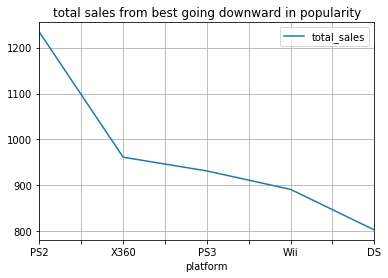

In [9]:
# Step 3. Analyze the data
# Looking at how sales varied from platform to platform (part #1)

game_platform =  games.groupby(['platform'])['total_sales'].sum().reset_index()
#print(game_platform)
game_platform = game_platform.sort_values('total_sales', ascending=False)
game_platform.info()

game_platform.head().plot(grid=True, x='platform', y='total_sales', title = 'total sales from best going downward in popularity')



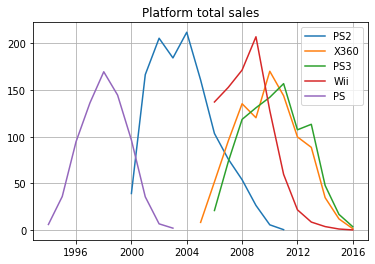

In [10]:
# Step 3. Analyze the data
# Looking at how sales varied from platform to platform (part #2)
# making a groupby so we can groupby platform and by total sales

games_best = games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
games_best = games_best.query('platform == ["PS2", "X360", "PS3", "Wii", "PS"]')
#print(games_best)


# making a custom column just for graphing by converting year of release to datetime variable
games_best['year_of_release_ts'] = games_best['year_of_release'].astype(str)
games_best['year_of_release_ts'] = pd.to_datetime(games_best['year_of_release_ts'])

# graphing each of the platforms from the top 5 platforms
ps2, = plt.plot(games_best.query('platform == "PS2"')['year_of_release_ts'].values, games_best.query('platform == "PS2"')['total_sales'].values)
x360, = plt.plot(games_best.query('platform == "X360"')['year_of_release_ts'].values, games_best.query('platform == "X360"')['total_sales'].values)
ps3, = plt.plot(games_best.query('platform == "PS3"')['year_of_release_ts'].values, games_best.query('platform == "PS3"')['total_sales'].values)
wii, = plt.plot(games_best.query('platform == "Wii"')['year_of_release_ts'].values, games_best.query('platform == "Wii"')['total_sales'].values)
ps, = plt.plot(games_best.query('platform == "PS"')['year_of_release_ts'].values, games_best.query('platform == "PS"')['total_sales'].values)

plt.grid()
plt.title('Platform total sales')
plt.legend([ps2, x360, ps3, wii, ps], ['PS2', 'X360', 'PS3', 'Wii', 'PS'])

# Conclusion from these graphs

Generally it takes around 9 years for these platforms to get popular and for old ones to fade out. PS used to be very popular in 1988 as it's peak, but has now died out throughout the years in the early 2000s

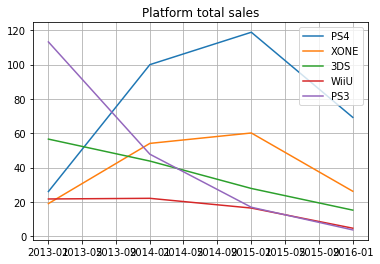

In [11]:
# Step 3. Analyze the data
# Determine what period you should take data for. To do so, look at your answers to the previous questions. 
# The data should allow you to build a prognosis for 2017.

# looking at the previous data, it seems that games past 2012 sold a lot, and is what we want
games_top = games[games.year_of_release > 2012]

# making a custom column just for graphing by converting year of release to datetime variable
games_top['year_of_release_ts'] = games_top['year_of_release'].astype(str)
games_top['year_of_release_ts'] = pd.to_datetime(games_top['year_of_release_ts'])

games_top_5 = games_top.groupby(['platform', 'year_of_release', 'year_of_release_ts'])['total_sales'].sum().reset_index()

#The PS3 console is ahead of the other consoles by 50 million sales
games_top.head(15)

#Which will grow and which ones will shrink?
ps4, = plt.plot(games_top_5.query('platform == "PS4"')['year_of_release_ts'].values, games_top_5.query('platform == "PS4"')['total_sales'].values)
xone, = plt.plot(games_top_5.query('platform == "XOne"')['year_of_release_ts'].values, games_top_5.query('platform == "XOne"')['total_sales'].values)
ds, = plt.plot(games_top_5.query('platform == "3DS"')['year_of_release_ts'].values, games_top_5.query('platform == "3DS"')['total_sales'].values)
wiiu, = plt.plot(games_top_5.query('platform == "WiiU"')['year_of_release_ts'].values, games_top_5.query('platform == "WiiU"')['total_sales'].values)
ps3, = plt.plot(games_top_5.query('platform == "PS3"')['year_of_release_ts'].values, games_top_5.query('platform == "PS3"')['total_sales'].values)

#adding extra stuff for the graph to make it look nicer
plt.grid()
plt.title('Platform total sales')
plt.legend([ps4, xone, ds, wiiu, ps3], ['PS4', 'XONE', '3DS', 'WiiU', 'PS3'])

# Conclusion

From these graphs, we can see that PS3 and 3DS is declining in sales while the WiiU is on the start of the decline. XOne and PS4 is still very high in terms of sale and is just now starting to drop a bit 

,platform,year_of_release,total_sales
0,3DS,2013,56.57
1,3DS,2014,43.76
2,3DS,2015,27.78
3,3DS,2016,15.14
4,DS,2013,1.54
5,PC,2013,12.38
6,PC,2014,13.28
7,PC,2015,8.52
8,PC,2016,5.25
9,PS3,2013,113.25


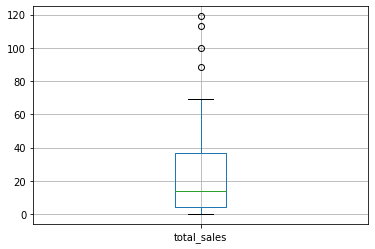

In [12]:
# Step 3. Analyze the data
# Build a box plot for the global sales of all games, broken down by platform. 
# Are the differences in sales significant? 
# What about average sales on various platforms? 
# Describe your findings.

games_top_plots = games_top.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

games_top_plots.boxplot()

#labels = ['2012 games and onward total sales']
#plt.show()

games_top_plots

#games_top.boxplot()

# Conclusion from the total_sales box plot

This boxplot shows the overall total_sales without any filters, showing that the median of platforms sell for around 18 million, while there are some outliers near 120 million.

PS4 mean of total sales
total_sales    78.535
dtype: float64

XBOX ONE mean of total sales
total_sales    39.83
dtype: float64

3DS mean of total sales
total_sales    35.8125
dtype: float64

PS3 mean of total sales
total_sales    45.3575
dtype: float64

XBOX 360 mean of total sales
total_sales    34.2
dtype: float64


Text(0.5, 1.0, 'Total number of sales for each platform')

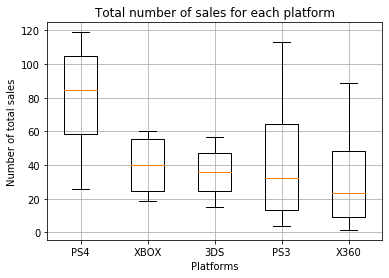

In [13]:
# Step 3. Analyze the data
# Build a box plot for the global sales of all games, broken down by platform "PS4". 
# Are the differences in sales significant? 
# What about average sales on various platforms? 
# Describe your findings.



games_PS4 = games_top_plots.query('platform == ["PS4"]').groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
games_XOne = games_top_plots.query('platform == ["XOne"]').groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
games_3DS = games_top_plots.query('platform == ["3DS"]').groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
games_PS3 = games_top_plots.query('platform == ["PS3"]').groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
games_X360 = games_top_plots.query('platform == ["X360"]').groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()


#printing out the means of total sales
print('PS4 mean of total sales')
print(games_PS4.mean())
print('\nXBOX ONE mean of total sales')
print(games_XOne.mean())
print('\n3DS mean of total sales')
print(games_3DS.mean())
print('\nPS3 mean of total sales')
print(games_PS3.mean())
print('\nXBOX 360 mean of total sales')
print(games_X360.mean())

#printing out the boxplots
plt.boxplot([games_top_plots.query('platform == ["PS4"]')['total_sales'].values, 
             games_top_plots.query('platform == ["XOne"]')['total_sales'].values,
            games_top_plots.query('platform == ["3DS"]')['total_sales'].values,
            games_top_plots.query('platform == ["PS3"]')['total_sales'].values,
            games_top_plots.query('platform == ["X360"]')['total_sales'].values])

#titling and formatting
plt.xticks([1, 2, 3, 4, 5], ['PS4', 'XBOX', '3DS', 'PS3','X360'])
plt.grid()
plt.xlabel('Platforms')
plt.ylabel('Number of total sales')
plt.title('Total number of sales for each platform')

# Conclusion from the platform box plot

From what I can see from the box plot, the PS4 has the highest amount of total sales, with a higher median and highest peak compared to all others. The PS3 had some outliers, but still also proves to sell well. However, from looking at previous graphs showing the colored total sales, the PS3 Platform is dying. Perhaps the total sales were just from a previous peak.

# Conclusion from box plot

The differences in sales are pretty significant. A lot of the games have been sold at around the 20-40 million range, but there are some particular outliers that have sold games over 100 million.

The PS4 graph shows that in terms of platforms, PS4 out performs the rest. The rest of the graphs show that they are below 50 around the median, while PS4 shows it's median being at 80+. Perhaps the PS4 is the reason why there is an outlier in the overall graph


             total_sales  user_score
total_sales     1.000000   -0.045454
user_score     -0.045454    1.000000

              critic_score  total_sales
critic_score      1.000000     0.348896
total_sales       0.348896     1.000000


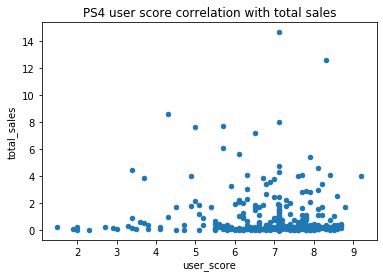

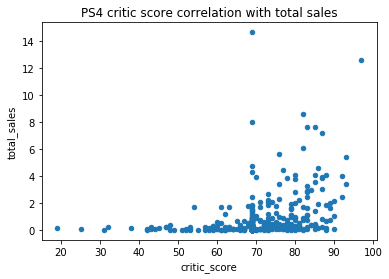

In [14]:
# Step 3: Analyze the data
# Compare user and professional reviews affecting sales
# Take a look at how user and professional reviews affect sales for one popular platform (choose "PS4"). 
# Build a scatter plot and calculate the correlation between reviews and critic_score and user_scores via sales.
games_top_user_score_pivot = games_top.pivot_table(index=['name', 'platform'], values = ['user_score', 'total_sales'])
games_user_score_ps4_pivot = games_top_user_score_pivot.query('platform == ["PS4"]')

#finding correlation and making scatter plot
user_score_sales_corr_ps4 = games_user_score_ps4_pivot.corr()
print(user_score_sales_corr_ps4)
games_user_score_ps4_pivot.plot(x= 'user_score', y = 'total_sales', kind='scatter', title = 'PS4 user score correlation with total sales')

#spacing between correlation
print()

#doing the same thing again but for critic score
games_top_critic_score_pivot = games_top.pivot_table(index=['name', 'platform'], values = ['critic_score', 'total_sales'])
games_critic_score_ps4_pivot = games_top_critic_score_pivot.query('platform == ["PS4"]')


corr_ps4 = games_critic_score_ps4_pivot.corr()
print(corr_ps4)
games_critic_score_ps4_pivot.plot(x= 'critic_score', y = 'total_sales', kind='scatter', title = 'PS4 critic score correlation with total sales')

# Conclusion based on scatter and correlation

There is a correlation between total sales and critic/user scores, though not very high. Just by looking at the graph, you can make the assumption that the better the score, the more sales the game will make. However, the correlation just isn't as linear as I would've wanted it to be.

             total_sales  user_score
total_sales     1.000000   -0.089634
user_score     -0.089634    1.000000

              critic_score  total_sales
critic_score      1.000000     0.371477
total_sales       0.371477     1.000000


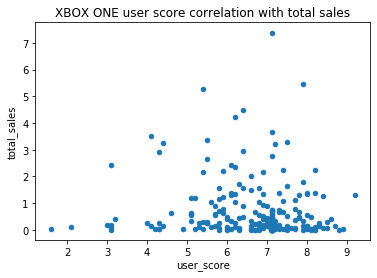

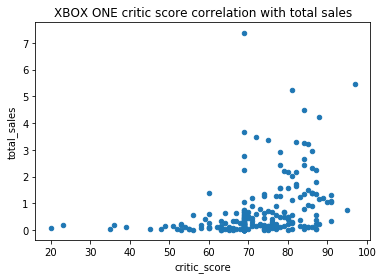

In [15]:
# Step 3: Analyze the data
# Compare user and professional reviews affecting sales
# Take a look at how user and professional reviews affect sales for one popular platform (choose "PS4"). 
# Build a scatter plot and calculate the correlation between reviews and critic_score and user_scores via sales.

#making a pivot table for xbox 
games_top_user_score_pivot = games_top.pivot_table(index=['name', 'platform'], values = ['user_score', 'total_sales'])
games_user_score_xbox_pivot = games_top_user_score_pivot.query('platform == ["XOne"]')

#finding correlation and making scatter plot
user_score_sales_corr_xbox = games_user_score_xbox_pivot.corr()
print(user_score_sales_corr_xbox)
games_user_score_xbox_pivot.plot(x= 'user_score', y = 'total_sales', kind='scatter', title = 'XBOX ONE user score correlation with total sales')

#spacing between correlation
print()

#doing the same thing again but for critic score
games_top_critic_score_pivot = games_top.pivot_table(index=['name', 'platform'], values = ['critic_score', 'total_sales'])
games_critic_score_xbox_pivot = games_top_critic_score_pivot.query('platform == ["XOne"]')


corr_xbox = games_critic_score_xbox_pivot.corr()
print(corr_xbox)
games_critic_score_xbox_pivot.plot(x= 'critic_score', y = 'total_sales', kind='scatter', title = 'XBOX ONE critic score correlation with total sales')

# Comparing with PS4 scatterplot and data

The correlations listed from XBOX ONE is a lot weaker compared to the correlations from the PS4.

In [16]:
# Step 3: Analyze the data

#making a pivot table to see most profitable genre
games_genre_pivot = games_top.pivot_table(index=['genre'], values = ['total_sales'])
games_genre_pivot = games_genre_pivot.sort_values('total_sales', ascending=False)
games_genre_pivot

,total_sales
genre,
Shooter,1.245882
Sports,0.703972
Platform,0.576081
Role-Playing,0.499623
Racing,0.469294
Fighting,0.441375
Action,0.420196
Misc,0.405290
Simulation,0.350968


# Conclusion for genres

Just by judging by the pivot table, we can immediately see that the shooter genre is the most profitable, while adventure games are severely lacking selling the least amount.

# Conclusion for step 3

From all the consoles, the PS4 is doing the best, and the best selling genre is shooter, while the worst is adventure. There is correlation with critic/user scores and total sales, but not very high. From the graphs, we were able to find that each platform generlaly dies out within 9 years

# Step 4

For each region (NA, EU, JP), determine:

    The top five platforms. Describe variations in their market shares from region to region.

    The top five genres. Explain the difference.

    Do ESRB ratings affect sales in individual regions?

In [17]:
#groupby platform
games_top_na = games_top.pivot_table(index=['platform'], values = ['rating', 'na_sales'])
games_top_eu = games_top.pivot_table(index=['platform'], values = ['rating', 'eu_sales'])
games_top_jp = games_top.pivot_table(index=['platform'], values = ['rating', 'jp_sales'])

games_top_na = games_top_na.sort_values('na_sales', ascending=False)
games_top_eu = games_top_eu.sort_values('eu_sales', ascending=False)
games_top_jp = games_top_jp.sort_values('jp_sales', ascending=False)


print('na top 5 platforms')
print(games_top_na.head())
print('\neu top 5 platforms')
print(games_top_eu.head())
print('\njp top 5 platforms')
print(games_top_jp.head())

na top 5 platforms
          na_sales
platform          
X360      0.439032
XOne      0.377004
Wii       0.285217
PS4       0.277398
WiiU      0.254000

eu top 5 platforms
          eu_sales
platform          
PS4       0.359923
Wii       0.257826
X360      0.228602
XOne      0.208866
PS3       0.196551

jp top 5 platforms
          jp_sales
platform          
3DS       0.223795
WiiU      0.094609
PS3       0.067681
PSV       0.051927
PSP       0.049104


# Results from the tables

For JP, the 3DS was the most successful, which is interesting because the 3DS doesn't appear in any other region in the top 5. 

It is also worth noting that for japan, the sales are much lower compared to other regions, where the 3ds is the only platform that surpasses 100k sales. 

For EU, the Wii did the best, while the PS4 isn't too far behind. 

And for NA, the XBOX 360 did the best, while the Wii is behind just a little bit

In [18]:
#groupby genre
games_top_na = games_top.pivot_table(index=['genre'], values = ['rating', 'na_sales'])
games_top_eu = games_top.pivot_table(index=['genre'], values = ['rating', 'eu_sales'])
games_top_jp = games_top.pivot_table(index=['genre'], values = ['rating', 'jp_sales'])

games_top_na = games_top_na.sort_values('na_sales', ascending=False)
games_top_eu = games_top_eu.sort_values('eu_sales', ascending=False)
games_top_jp = games_top_jp.sort_values('jp_sales', ascending=False)


print('na top 5 genres')
print(games_top_na.head())
print('\neu top 5 genres')
print(games_top_eu.head())
print('\njp top 5 genres')
print(games_top_jp.head())

na top 5 genres
          na_sales
genre             
Shooter   0.586845
Sports    0.305000
Platform  0.245135
Fighting  0.194375
Misc      0.177355

eu top 5 genres
            eu_sales
genre               
Shooter     0.469840
Sports      0.282804
Racing      0.237529
Platform    0.210541
Simulation  0.176129

jp top 5 genres
              jp_sales
genre                 
Role-Playing  0.174795
Fighting      0.095625
Simulation    0.072903
Puzzle        0.069412
Platform      0.064730


# Results from the tables

For every other region other than JP, the shooter genre is the most successful and popular. For JP, Role-Playing is the top genre, while shooter isn't even on JP's top 5 genre list. Instead, JP has higher sales in Fighting, Puzzle, Simuilation, and finally Platform. Though, it is worth noting that JP has significantly less sales then NA and EU.

For both NA and EU, Shooter and Sports are the top two in the same order, while for NA, platforming, fighting, and misc comes after.

For EU, racing, Platform, and Simulation are the rest on the list.

In [19]:
#removing nulls on any rows without rating
games_top_no_null = games_top.dropna()

#groupby rating
game_rating_na =  games_top_no_null.groupby(['rating'])['na_sales'].sum().reset_index()
game_rating_eu =  games_top_no_null.groupby(['rating'])['eu_sales'].sum().reset_index()
game_rating_jp =  games_top_no_null.groupby(['rating'])['jp_sales'].sum().reset_index()

game_rating_na = game_rating_na.sort_values('na_sales', ascending=False)
game_rating_eu = game_rating_eu.sort_values('eu_sales', ascending=False)
game_rating_jp = game_rating_jp.sort_values('jp_sales', ascending=False)

print('na top ratings')
print(game_rating_na)
print('\neu top ratings')
print(game_rating_eu)
print('\njp top ratings')
print(game_rating_jp)

na top ratings
  rating  na_sales
2      M    165.21
0      E     79.05
1   E10+     54.24
3      T     49.79

eu top ratings
  rating  eu_sales
2      M    145.32
0      E     83.36
1   E10+     42.69
3      T     41.95

jp top ratings
  rating  jp_sales
3      T     20.59
0      E     15.14
2      M     14.11
1   E10+      5.89


# Results from the tables

ESRB does in fact affect sales in certain regions. For JP, T is the most popular rating that is most sold, while in comparison to NA and EU, T is near the bottom. 

For NA and EU, M is the most popular, followed by E, then either T or E10+. 

Results makes sense comparing to genre, because generally shooters are considered rated M, while role-playing games generally gets a T rating.

# Conclusion for step 4

From my observations NA and EU follow closely together in sales and genres. Both regions like shooters a lot, and cater towards the M rating. NA likes the XBOX 360 the most, while EU likes the Wii. 

JP on the other hand has different overall taste in terms of genre, being Role-playing, and having it's most popular platform being the 3DS. Granted, sales are a lot lower than the other regions, it's still very interesting to observe. 

# Step 5

Average user ratings of the Xbox One and PC platforms are the same.

Average user ratings for the Action and Sports genres are different.

Set the alpha threshold value yourself.

Explain:

    —How you formulated the null and alternative hypotheses
    —What significance level you chose to test the hypotheses, and why


# Null hypothesis

The null hypothesis:
- h0 is to see if the average user rating of XBOX One is the same user rating as PC
- h1 is to see if the average user rating of XBOX One is not the same user rating as PC

In [20]:
PC_games_top = games_top.query('platform == "PC"')
XBOX_games_top = games_top.query('platform == "XOne"')

alpha = 0.05

results = st.ttest_ind(PC_games_top['user_score'], XBOX_games_top['user_score'], equal_var = False)

print('p-value:', results.pvalue)

if(results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")
    


p-value: 0.06817560404247579
We can't reject the null hypothesis


# Conclusion and explanation

I set the alpha at 0.05 because the majority of the data will be in the 95 percent, and it's just a basic standard 

that will work well for these type of tests



CONCLUSION FROM THIS TEST

    The means are statistically different with a significance alpha value of 0.5, therefore We CAN'T REJECT the NULL HYPOTHESIS

# Null hypothesis

The null hypothesis:
- h0 is to see if the average user rating of the action genre is the same user rating as the sports genre
- h1 is to see if the average user rating of action genre is not the same user rating as sports genre

In [21]:
action_games_top = games_top.query('genre == "Action"')
sports_games_top = games_top.query('genre == "Sports"')

alpha = 0.05

results = st.ttest_ind(action_games_top['user_score'], sports_games_top['user_score'], equal_var = False)

print('p-value:', results.pvalue)

if(results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 1.4084155169856942e-20
We reject the null hypothesis


# Conclusion

I set the alpha at 0.05 because the majority of the data will be in the 95 percent, and it's just a basic standard 

that will work well for these type of tests

CONCLUSION FROM THIS TEST

    The means are statistically different with a significance alpha value of 0.5, therefore We REJECT the NULL HYPOTHESIS  

# Overall Conclusion

It seems that currently, the best games that would sell well are shooters that have an M ESRB rating. For the JP market, it is worth noting that role playing games with an T ESRB rating on the 3DS will sell very well, just not nearly as high sales compared to NA and EU.

Concering platforms, the top platforms that still haven't faded away are the PS4, XBOX ONE, and soon to be faded 3DS for the JP region. It is worth nothing that generally consoles fade away in 9 years prior to release, so the PS4 and XBOX ONE will still have some time left before they fade.

Concering correlation between reviews and total sales, I've found that there is a slight correlation between user/critic scores and sales, but not as huge of a difference as I have thought. According to the graph, the higher the score, the higher the sales, but this only really reflects on games with high user/critic scores.

From the null hypotheses that I have tested, we can't reject the null hypotheses that the average user rating is the same as PC. From this, we can conclude that perhaps PC released games is also worth investing into.